In [ ]:
 Transmission (%)
  100 |                                               CCCCCCCCCCCCCCCCCCCCCCCC
      |                                              CCCCCCCCCCCCCCCCCCCCCCCCC   
   90 |                                             CCSSSSSSSSSSSSSSSSSSSSSSSSSS
      |                                            CSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
   80 |                                           SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
      |                                         SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
   70 |                                        SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
      |                                      SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
   60 |                                    SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
      |                                  SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
   50 |                                SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
      |                              SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
   40 |                             SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
      |                           SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
   30 |                         SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
      |                       SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
   20 |                     SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
      |                   SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
   10 |                 SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS
      |              SSSSSSSSSSSSSSSSSSSS
    0 |_____|______|______|______|______|______|______|______|______|______|______|→ Wavelength (nm)
       450    475     500    525    550    575    600    625    650    675    700  

          ~562 nm (S)            ~565 nm (C)


Enter Chroma CSV filename (default: chroma_t565lpxr.csv): chroma_t565lpxr.csv
Enter Semrock CSV filename (default: semrock_ff562_di03.csv): semrock_ff562_di03.csv


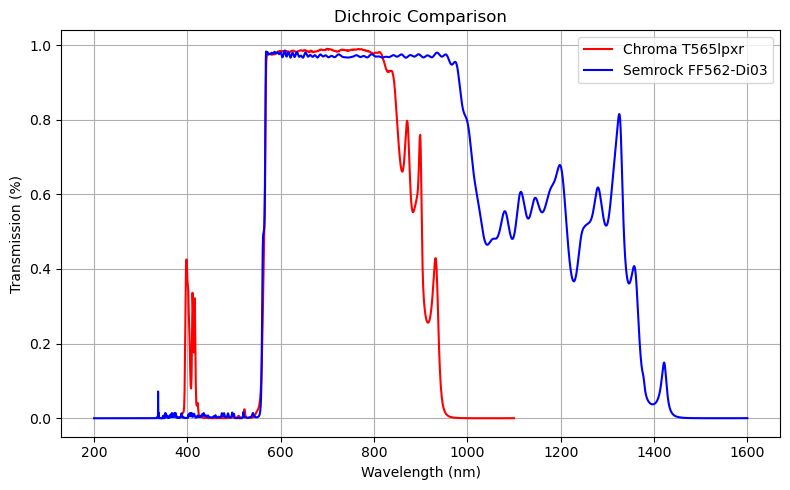

In [3]:
#!/usr/bin/env python3

import csv
import matplotlib.pyplot as plt

def read_spectral_csv(filename):
    """
    Reads a CSV file with two columns:
        1) Wavelength (nm)
        2) Transmission or Reflectance (in % or fraction)

    Returns:
        wavelengths (list of floats)
        values (list of floats)
    """
    wavelengths = []
    values = []
    with open(filename, 'r', encoding='utf-8-sig') as f:
        #reader = csv.reader(f)
        reader = csv.reader(f, delimiter='\t')
        # Optional: skip header if present
        header = next(reader, None)
        # If your file has a header row, this line reads it
        # If it does not, you can comment the above line out

        for row in reader:
            if len(row) < 2:
                continue  # Skip any incomplete rows
            try:
                w = float(row[0])
                v = float(row[1])
                wavelengths.append(w)
                values.append(v)
            except ValueError:
                # Skip rows that don't have valid floats
                continue
    return wavelengths, values

def plot_dichroic_data(wl_chroma, val_chroma, wl_semrock, val_semrock,
                       label_chroma="Chroma T565lpxr",
                       label_semrock="Semrock FF562-Di03",
                       y_label="Transmission (%)"):
    """
    Plots two curves (Chroma vs. Semrock) on the same figure
    """
    plt.figure(figsize=(8, 5), dpi=100)

    plt.plot(wl_chroma, val_chroma, label=label_chroma, color='red')
    plt.plot(wl_semrock, val_semrock, label=label_semrock, color='blue')

    plt.title("Dichroic Comparison")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    # Example usage:
    chroma_file = input("Enter Chroma CSV filename (default: chroma_t565lpxr.csv): ") or "chroma_t565lpxr.csv"
    semrock_file = input("Enter Semrock CSV filename (default: semrock_ff562_di03.csv): ") or "semrock_ff562_di03.csv"

    # Read CSV data
    wl_chroma, val_chroma = read_spectral_csv(chroma_file)
    wl_semrock, val_semrock = read_spectral_csv(semrock_file)

    # Plot the two sets of data
    plot_dichroic_data(wl_chroma, val_chroma, wl_semrock, val_semrock,
                       label_chroma="Chroma T565lpxr",
                       label_semrock="Semrock FF562-Di03",
                       y_label="Transmission (%)")

if __name__ == "__main__":
    main()
